# Mapping Point and Polygon Data
### by [Kate Vavra-Musser](https://vavramusser.github.io) for the [R Spatial Notebook Series](https://vavramusser.github.io/r-spatial)

## Introduction

In this notebook, we’ll explore the basics of mapping point and polygon data using R. We’ll demonstrate how to access open-source spatial datasets from [*rnaturalearth*](https://cran.r-project.org/web/packages/rnaturalearth/index.html), an excellent source freely available of global administrative boundaries, cities, rivers, and other geographic features.

We’ll use sf for spatial data handling and ggplot2 for visualization, covering basic mapping techniques and styling options.

### Notebook Goals
This notebook provides a foundation for working with spatial data, allowing users to create informative maps with both point and polygon layers.

### ★ Prerequisites ★
  * [IPUMS NHGIS Data Extraction Using ipumsr](https://platform.i-guide.io/notebooks/be08e56e-1c08-458e-a230-263c64d386bc)
    * [IPUMS NHGIS Data Extraction Using ipumsr: Supplemental Exercise 1](https://vavramusser.github.io/r-spatial)
  * [Spatial Exploration and Preprocessing with IPUMS NHGIS](https://platform.i-guide.io/notebooks/2927de7d-45a4-46d7-8f76-a569af637d82)

### Notebook Overview
...

---

## 1. Setup
This section will guide you through the process of installing essential packages.

##### Required Packages

[**ggplot2**](https://cran.r-project.org/web/packages/ggplot2/index.html) · Create Elegant Data Visualisations Using the Grammar of Graphics.  This notebook uses the following functions from *ggplot2*.

* *CoordSf* · visualize sf objects
  * *geom_sf* · geometric objects (points, lines, or polygons)
* [*ggplot*](https://rdrr.io/cran/ggplot2/man/ggplot.html) · create a new ggplot
* [*ggtheme*](https://rdrr.io/cran/ggplot2/man/ggtheme.html) · complete themes
  * *theme_minimal* · minimal theme
* [*labs*](https://rdrr.io/cran/ggplot2/man/labs.html) · modify axis, legend, and plot labels
* [*theme*](https://rdrr.io/cran/ggplot2/man/theme.html) · modify components of a theme

[**sf**](https://cran.r-project.org/web/packages/sf/index.html) · Support for simple features, a standardized way to encode spatial vector data. Binds to 'GDAL' for reading and writing data, to 'GEOS' for geometrical operations, and to 'PROJ' for projection conversions and datum transformations. Uses by default the 's2' package for spherical geometry operations on ellipsoidal (long/lat) coordinates.  This notebook uses the following functions from *sf*.

* [*st_crs*](https://rdrr.io/cran/sf/man/st_crs.html) · retrieve coordinate reference system from object
* [*st_transform*](https://rdrr.io/cran/sf/man/st_transform.html) · transform or convert coordinates of simple feature

### 1a. Install and Load Required Packages
If you have not already installed the required packages, uncomment and run the code below:

In [1]:
# install.packages(c("ggplot2", "sf"))

Load the packages into your workspace.

In [2]:
library(ggplot2)
library(sf)

Linking to GEOS 3.11.2, GDAL 3.8.2, PROJ 9.3.1; sf_use_s2() is TRUE



In [13]:
states <- st_read("ipums_nhgis_states.shp")

Reading layer `ipums_nhgis_states' from data source 
  `C:\Users\vavra\Dropbox\R Spatial\r-spatial holding pen\ipums_nhgis_states.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 52 features and 14 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -7115208 ymin: -1685018 xmax: 3321632 ymax: 4591848
Projected CRS: USA_Contiguous_Albers_Equal_Area_Conic


In [12]:
airports <- st_read("ipums_nhgis_places.shp")

Reading layer `usa_airports' from data source 
  `C:\Users\vavra\Dropbox\R Spatial\r-spatial holding pen\usa_airports.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 131 features and 205 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -161.839 ymin: 19.7148 xmax: -71.01641 ymax: 71.2893
Geodetic CRS:  WGS 84


In [7]:
# country boundary polygons
#countries <- ne_countries(scale = "medium", returnclass = "sf")

# populated places point locations
#cities <- ne_download(scale = "medium", type = "populated_places", category = "cultural", returnclass = "sf")

Reading layer `ne_50m_populated_places' from data source 
  `C:\Users\vavra\AppData\Local\Temp\Rtmpmwduik\ne_50m_populated_places.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1251 features and 137 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -175.2206 ymin: -90 xmax: 179.2166 ymax: 78.22097
Geodetic CRS:  WGS 84


## 3. Data Preparation

Before mapping, it’s essential to inspect the data structure and ensure that all spatial layers are in the same Coordinate Reference System (CRS). This step is crucial because different layers need to be aligned spatially to appear correctly on the map.

The *st_crs()* function allows us to check and set the CRS of spatial data in sf. If any layers use different CRSs, we can transform them using the *st_transform()* function, ensuring compatibility and accurate mapping.

In [14]:
st_crs(states)

Coordinate Reference System:
  User input: USA_Contiguous_Albers_Equal_Area_Conic 
  wkt:
PROJCRS["USA_Contiguous_Albers_Equal_Area_Conic",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["USA_Contiguous_Albers_Equal_Area_Conic",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",37.5,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-96,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",29.5,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",4

In [15]:
st_crs(airports)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

From this comparison, we can see that the **states** shapefile we downloaded from the IPUMS NHGIS repository is in [**NAD83 (EPSG 4269)**](https://epsg.io/4269) while the **airports** shapefile we downloaded from Natural Earth is in [**WGS84 (EPSG 4326)**](https://epsg.io/4326).  Before we can map these two files in the same map, we will need to transform them to the same CRS.  Since we are working wihin the United States, and the **NAD83** CRS is specifially for working in North America (while the **WGS84** CRS is a global CRS), let's continue our project in **NAD83**.  Therefore, let's transform the **airports** shapefile using the **states** CRS.

In [16]:
airports <- st_transform(airports, crs = st_crs(states))

## 4. Basic Mapping of Points and Polygons with ggplot2

Now we’re ready to map our data using the *geom_sf()* function from *ggplot2*, which handles spatial objects like sf polygons and points. Here, we’ll:

* Plot the country boundaries as filled polygons in a light gray color.
* Overlay the city points on top, using a distinct color to differentiate them from the polygon layer.

This map gives a straightforward view of the spatial distribution of countries and cities globally, and serves as a base for further styling.

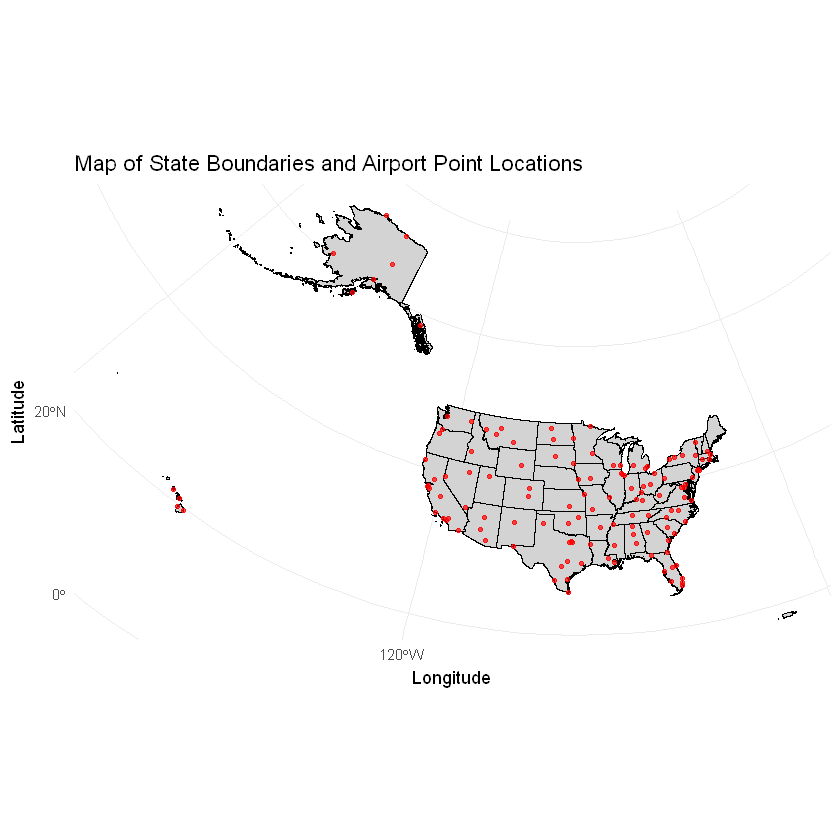

In [18]:
ggplot() +
  geom_sf(data = states, fill = "lightgray", color = "black") +        # state polygons
  geom_sf(data = airports, color = "red", size = 1, alpha = 0.7) +     # airport point locations
  labs(title = "Map of State Boundaries and Airport Point Locations",
       x = "Longitude", y = "Latitude") +
  theme_minimal()

## 5. Styling and Customization

To enhance our map’s readability and aesthetic, we’ll add some additional styling elements:

* Fill colors: Set the polygon fill color to lightblue and outline color to gray40.
Legend: Use scale_color_manual() to specify a color for the cities and adjust the legend to reflect the "City" label.
* Labels: Customize the map title, axis labels, and legend position.

This customization allows us to create a more visually appealing and informative map, making it easy to distinguish between the countries and cities while providing helpful labels.

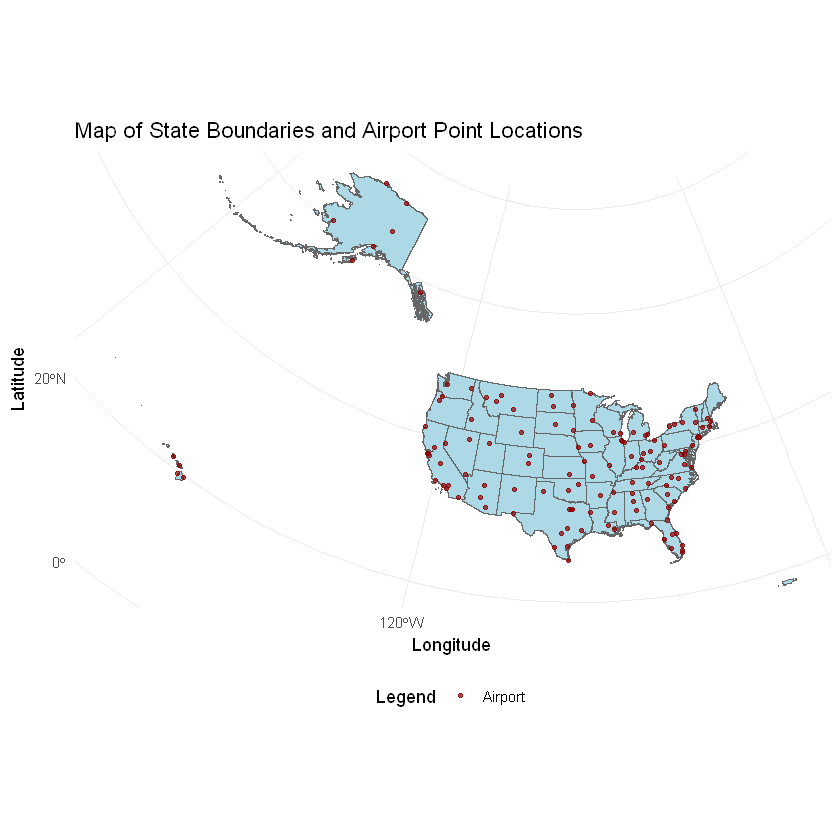

In [23]:
ggplot() +
  geom_sf(data = states, fill = "lightblue", color = "gray40") +
  geom_sf(data = airports, aes(color = "Airport"), size = 1.2, alpha = 0.7) +
  scale_color_manual(values = c("Airport" = "darkred")) +
  labs(title = "Map of State Boundaries and Airport Point Locations",
       color = "Legend",
       x = "Longitude", y = "Latitude") +
  theme_minimal() +
  theme(legend.position = "bottom")